<a href="https://colab.research.google.com/github/jacobarger/Fetch_Exercise/blob/main/Similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please enter the first piece of text: 
asdfdf
Please enter the second piece of text: 
asdfsdfa


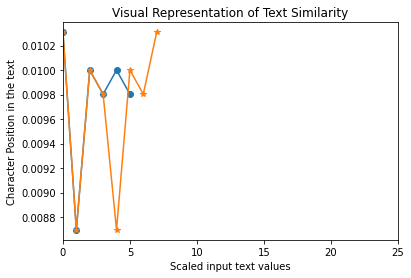

Estimated simialrity score using cosine similarity:  0.8545584874065462


In [121]:
# Written by Jacob Barger 5/17/21
# String Similarity Exercise for Fetch Rewards 

import numpy as np
import string
import re
import matplotlib.pyplot as plt

class Similarity:

  # initialize empty strings to hold each of the pieces of input text
  input_string1 = ""
  input_string2 = ""

  # constructor to take in and initalize input text as class varibales
  def __init__(self, string_1, string_2):
    self.input_string1 = string_1
    self.input_string2 = string_2
    self.pairs1 = ""
    self.pairs2 = ""

    # simple edge case testing to rule out empty strings
    if self.input_string1 == "" or self.input_string2 == "":
      print("ERROR: Empty input detected, exiting.")
      exit()
    
    # regex = re.compile('[^a-zA-Z]')
    # #First parameter is the replacement, second parameter is your input string
    # self.input_string1 = regex.sub('', self.input_string1)
    # self.input_string2 = regex.sub('', self.input_string2)
  
  # In this function, we are going to take somwhat of an interesting approach to analyze the 
  # similarity visually. To do this we will convert the to strings into 2D arrays
  # with the index / character position as the first column, and the ascii value of
  # the character as the second column 
  def get_pairs(self):
    # initialize array of zeroes with size equal to string length
    # as place holders for later operations
    coord_set_1 = np.zeros((len(self.input_string1), 2))
    coord_set_2 = np.zeros((len(self.input_string2), 2))

    # iterate over each character in the strings, and set the first column
    # equal to the index for simple graphical processing, and the second column 
    # equal to the ascii value of the associated character 
    for i in range(0, len(self.input_string1)):
      coord_set_1[i][0] = i
      coord_set_1[i][1] = ord(self.input_string1[i])
    for i in range(0, len(self.input_string2)):
      coord_set_2[i][0] = i
      coord_set_2[i][1] = ord(self.input_string2[i])
    

    # scale ascii values to be between zero and one for a nicer scaled visual representation
    coord_set_1[:, 1] = 1.0 / coord_set_1[:, 1] 
    coord_set_2[:, 1] = 1.0 / coord_set_2[:, 1] 

    # 'return' results as class variables
    self.pairs1 = coord_set_1
    self.pairs2 = coord_set_2

  # function to generate a plot for a visual representation
  # of similarity between the two pieces of text w
  def plot(self):
    # plot string 1 with o as marker
    plt.plot(self.pairs1[:, 0], self.pairs1[:, 1], marker='o')
    # plot string 2 with * as marker
    plt.plot(self.pairs2[:, 0], self.pairs2[:, 1], marker='*')

    # set title(s)
    plt.title("Visual Representation of Text Similarity")
    plt.xlabel("Scaled input text values")
    plt.ylabel("Character Position in the text")
    

    # set y limit to zoom in on curve adjusted for punctuation if you wish (comment / uncomment)
    # plt.ylim(0, 0.013)
    plt.xlim(0,25)
    plt.show()


  # function to calculate the similarity of the two arrays 

  def calculate_similarity(self):
    # grab the converted ascii values from the pairs extracted earlier, set names as a and b
    # for easy typability
    a = self.pairs1[:, 1]
    b = self.pairs2[:, 1]

    # calculate the average value for that string
    a_avg = int(np.average(a))
    b_avg = int(np.average(b))

    # if the two input texts are not the same length, pad the input strings with average value of 
    # that piece of input text
    if len(a) < len(b):
      diff = len(b) - len(a)
      c = np.ones(diff) * a_avg
      a = np.append(a,c)
    elif len(b) < len(a):
      diff = len(a) - len(b)
      c = np.ones(diff) * b_avg
      b = np.append(b,c)
    
    # now that the arrays have been set to the same length,
    # we can run a cosine similarity check on the floating point
    # arrays 

    cosine_similarity = np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
    print("Estimated simialrity score using cosine similarity: ", cosine_similarity)



################## MAIN SCRIPT / METHOD ################
# Get input text
print("Please enter the first piece of text (press enter when your input is complete): ")
string1 = input()
print("Please enter the second piece of text (press enter when your input is complete): ")
string2 = input()

# Setup Post Request
# define api endpoint 
endpoint = "http://somesite.com/API"
# setup payload
payload = {'api_string_1' : string1,
        'api_string_2': string2}  
# shoot post request
request_obj = requests.post(url = endpoint, data = payload)
simialrity_score = request_obj.text
#print("The similarity score is", similarity_score)

# call all the class functions to process the strings 
Similarity_checker = Similarity(string1, string2)
Similarity_checker.get_pairs()
Similarity_checker.plot()
Similarity_checker.calculate_similarity()
